# Taxi Availability Predictor

For this exercise, we will be trying to predict the percentage amount of available taxis on the road based on the data from the same period of time last year.

In other words, the predictor should be just `number_of_available_taxis_in_the_same_period_last_year`/`total_number_of_available_taxis`

For this project, we have a folder of data based off last year's data set. Going into the `taxi availability data` folder, we will see two types of files:
1. A series of csv datasets with the timestamp from last year. e.g. `2017-12-09.csv`
2. A single public-transport-capacity-monthly-taxi-population.csv which gives us the full number of taxis owned by operators.

We going to make an assumption that the prediction which we make is going to heavily rely on the previous data of the __same__ period as last year.

## Analysing Datasets for Number of Available Taxis

First, let's try to read in a data set first to understand our results better! We shall try to read in `2017-12-09 Saturday.csv` which is the same Saturday as today last year.

In [1]:
%matplotlib inline
import pandas as pd

df_available_taxis = pd.read_csv("data/2017-12-09.csv")
df_available_taxis.head()

,Unnamed: 0,timestamp,available_taxis
0,0,2017-12-09T00:00:00,4254
1,1,2017-12-09T01:00:00,4612
2,2,2017-12-09T02:00:00,4781
3,3,2017-12-09T03:00:00,3739
4,4,2017-12-09T04:00:00,3482


The data that we are working on is all real! They are retrieved from `data.gov.sg`. Specifically at https://data.gov.sg/dataset/taxi-availability.

Notice that the data on the web page is not in a csv format! These data are in a weird `json` format, requested using `API` calls. For now, no worries about all these, the main part to note is that most datasets are retrieved with the use of an `API` call. It's beyond the scope of our Data Science Introduction course, but understand that at a basic level, most data set will already be retrieved by senior programmers in Data Science team and passed over to us as junior Data Scientists in the `csv` format.

Similarly, this `2017-12-09 Saturday.csv` file has already been retrieved and treated for the use of this exercise. The results of the `API` call is stored in two columns.
1. Timestamp: which is the time of the data set
2. Available Taxis: the number of operating taxis on the road.

We can also visualise the data set to see it better.

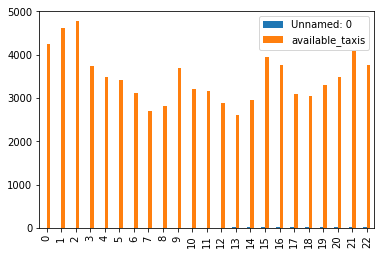

In [2]:
df_available_taxis.plot(kind="bar")

In our predictor, we will have to pass in the nearest hour to get the number of available taxis in the same period last year. Remember that we only have data sets in this case from `2017-12-04` to `2017-12-10`.

Let us try to express it as a function, which reads a csv file on the fly based on the date and hour, and return us the number of available taxis.

In [5]:
def get_available_taxi(date,hour):
    df_taxis = pd.read_csv("data/{}.csv".format(date))
    if hour < 10: # format the timestamp to include 0 padding
        h = "0{}".format(hour)
    else:
        h = hour
    timestamp = "{}T{}:00:00".format(date,h)
    return df_taxis.loc[df_taxis['timestamp'] == timestamp].available_taxis.iloc[0]

get_available_taxi("2017-12-08",20)

4305

Let's try also for the date of 2017-12-06, wednesday, at 3pm.

In [6]:
get_available_taxi("2017-12-06",15)

4491

## Analysing Total Number of Taxis

Next, let's analyse the data set for total number of taxis, namely `public-transport-capacity-monthly-taxi-population.csv`

In [7]:
df_total_taxis = pd.read_csv("data/public-transport-capacity-monthly-taxi-population.csv")
df_total_taxis.head()

,month,company,taxi_fleet
0,2005-01,Comfort,9952
1,2005-01,CityCab,4965
2,2005-01,SMRT,2441
3,2005-01,YTC,1223
4,2005-01,Individual Yellow- Top,696


Notice, that this data set is not as straight forward as it is. The number of taxis that we have is very disparate, it's first separated by the individual company, then also broken down by the month.

We will need a way to be able to retrieve out the total number of taxis by retrieving the month of our predictor, and then summing up the number of taxis of each company. This should give us a good practise of using Pandas to query and sum up datasets! A good recap of our lesson 1.

In [10]:
def get_total_number_of_taxi_by_year_month(year_month):
    return df_total_taxis.loc[df_total_taxis['month']==year_month]["taxi_fleet"].sum()
get_total_number_of_taxi_by_year_month("2017-12")

23140

Let's try for other values, say let's see the total number of taxis for January of 2010.

In [11]:
get_total_number_of_taxi_by_year_month("2010-01")

24845

## Creating the Predictor

Now, let's wrap everything we have up properly.

Let's say we need to predict the availability of taxis on 10th December, Monday, 2018 at 10pm, we will look at the number of corresponding taxis last year, divided by the total number of taxis.

In [12]:
def predictor(year,month,date,hour):
    if date < 10:
        d = "0{}".format(date)
    else:
        d = date
    total_taxis = get_total_number_of_taxi_by_year_month("{}-{}".format(year,month))
    available_taxis = get_available_taxi("{}-{}-{}".format(year,month,d),hour)
    return available_taxis/total_taxis * 100

monday_10pm_taxi_prob = predictor(2017,12,10,22)

monday_10pm_taxi_prob

12.359550561797752

Another way of looking at it, it's about 12 out of every 100 taxis, which works out to you should see an average number of 100/12 = 8 or 9 occupied taxis before you get one available on the streets.

We can use the predictor to pass in for any given date range in the first week of December. Let's say Wednesday at 5pm, which is corresponds to `2017-12-06`.

In [13]:
wednesday_5pm_taxi_prob = predictor(2017,12,6,17)
wednesday_5pm_taxi_prob

17.575626620570443